#Image Processing Techniques

 The task in hand is to apply filters on images, we need to import the matplotlib library, followed by numpy and skimage. For those of you not familiar with Skimage, let me quickly help you understand its use cases. Skimage offers a variety of image processing tools, including filtering, morphology, segmentation, transformations, and exposure adjustments. It is well-suited for tasks such as feature extraction, image enhancement and object detection.

In [ ]:
#Code to install the library
#pip install -U scikit-image

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski

### Images available

Next, let's look at some sample images present in the scikit image library. Below is the code to obtain the the available images from the library. .

In [ ]:
import skimage.data as data

# List all attributes of the skimage.data module that are callable (i.e., functions)
available_images = [name for name in dir(data) if callable(getattr(data, name))]

print(available_images)


['astronaut', 'binary_blobs', 'brain', 'brick', 'camera', 'cat', 'cell', 'cells3d', 'checkerboard', 'chelsea', 'clock', 'coffee', 'coins', 'colorwheel', 'download_all', 'eagle', 'file_hash', 'grass', 'gravel', 'horse', 'hubble_deep_field', 'human_mitosis', 'immunohistochemistry', 'kidney', 'lbp_frontal_face_cascade_filename', 'lfw_subset', 'lily', 'logo', 'microaneurysms', 'moon', 'nickel_solidification', 'page', 'palisades_of_vogt', 'protein_transport', 'retina', 'rocket', 'shepp_logan_phantom', 'skin', 'stereo_motorcycle', 'text', 'vortex']


For our purpose let's import a couple of images namely "camera" and "brick". Feel free to try  this exercise with other images as well.

In [ ]:
images = (
    'brick',
    'camera',
)

In [ ]:
from skimage.data import camera, brick

Once we've imported the image, let's view the shape and the pixels present in the image in NumPy array format.

array([[200, 200, 200, ..., 189, 190, 190],
       [200, 199, 199, ..., 190, 190, 190],
       [199, 199, 199, ..., 190, 190, 190],
       ...,
       [ 25,  25,  27, ..., 139, 122, 147],
       [ 25,  25,  26, ..., 158, 141, 168],
       [ 25,  25,  27, ..., 151, 152, 149]], dtype=uint8)
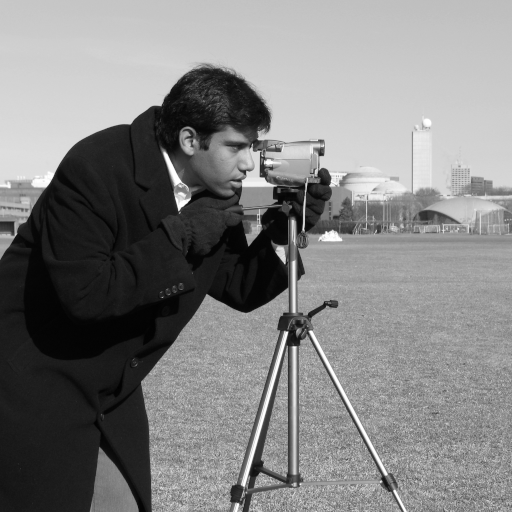

In [ ]:
camera()

In [ ]:
camera().shape

(512, 512)

The top left pixel has a value of 200 while the right bottom pixel has a value of 149 and the resolution of the image is 512 x 512.

Next, let's view the image we imported that is "camera". The code is very simple as shown below. Let's run it.

<ipython-input-7-67be414aa47d>:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  ski.io.imshow(camera());


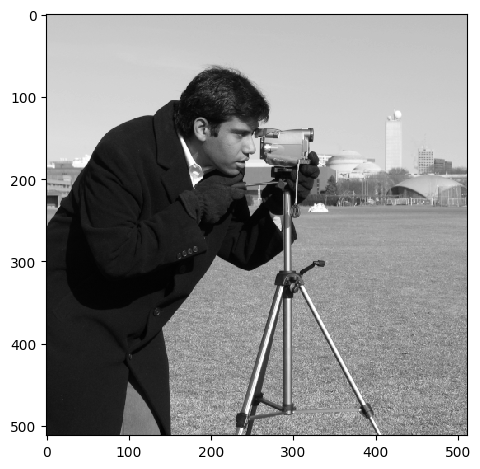

In [ ]:
ski.io.imshow(camera());

Similarly let's also view the brick image we just imported.

<ipython-input-8-ab8c23698386>:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  ski.io.imshow(brick());


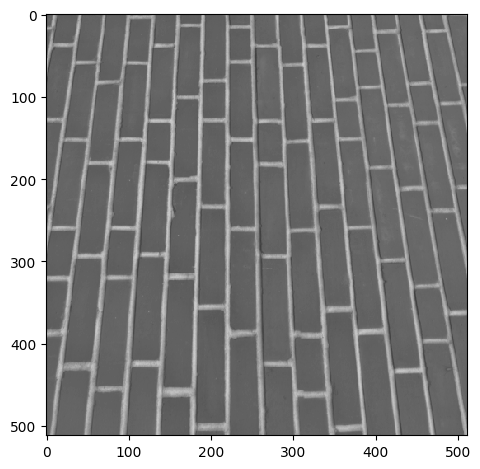

In [ ]:
ski.io.imshow(brick());

# Custom kernels

Now that we've successfully imported the images, it time to apply filters to them. Some of the most basic filters in computer vision include the horizontal and vertical filteres. Let first define the vertical filter.

#### Vertical Kernal

In [ ]:
v_filter = [[-5, 0, 5],
        [-0.5, 0, 0.5],
        [-5, 0, 5]]

Here in our manual vertical filter. As you can observe the size of the filter is 3x3. Notice how we've used the values of -5 and 5 at the corners of the filter. These are strong weights which help accentuate the differences in the image. Also notice how the middle column has 0's in it. This is crucial to highlight the vertical portions of the image.

Next lets define the apply filter function for our image. This functionn takes an image and a convolutionalfilterl as input and returns the output of the convolutionn. It first calculates thedimensions of the  imag and the filter, and, then initializes an output imagewith 0 pixel values ofh the same siz as the inpute. The functionthen slidess overthe image as shown in the previous video and multiplies the values of the filter with the respective positons of the image to generate the values for the resultant output. Note that this function will only work when both the image and the kernel have a square shape. That means, the length and the width is the same..

In [ ]:
#def apply_filter(image, v_filter):

    # Get dimensions of the image
    width = image.shape[1]
    kw = len(v_filter)

    # Prepare output image
    output = [[0] * width for _ in range(width)]

    # Apply filter to the image
    for y in range(1, width - 1):
        for x in range(1, width - 1):
            sum_ = 0
            for v_filter_y in range(kw):
                for v_filter_x in range(kw):
                    val = image[y + v_filter_y - 1][x + v_filter_x - 1]
                    sum_ += v_filter[v_filter_y][v_filter_x] * val

            output[y][x] = sum_

    return np.array(output)

In [ ]:
def apply_filter(image, v_filter):

    # Get dimensions of the image
    width = image.shape[1]
    kw = len(v_filter)

    # Convert the image to a data type that supports negative values
    image = image.astype(np.int16)  # or np.float32

    # Prepare output image
    output = [[0] * width for _ in range(width)]

    # Apply filter to the image
    for y in range(1, width - 1):
        for x in range(1, width - 1):
            sum_ = 0
            for v_filter_y in range(kw):
                for v_filter_x in range(kw):
                    val = image[y + v_filter_y - 1][x + v_filter_x - 1]
                    sum_ += v_filter[v_filter_y][v_filter_x] * val

            output[y][x] = sum_

    return np.array(output)

##### Vertical Kernal for the "Camera" image

Now that we've defined the function, it's time to apply it on our image and take a look at the output. Let's apply it first on the camera image.

<ipython-input-16-504ae07ab7e0>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  ski.io.imshow(output, cmap=plt.cm.gray);


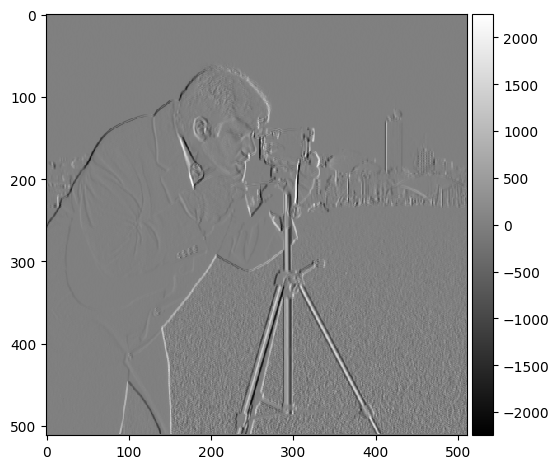

In [ ]:
output = apply_filter(camera(), v_filter)  # Or h_filter, depending on the intended filter.
ski.io.imshow(output, cmap=plt.cm.gray);

Take a look at the output, the image named camera displayed over here, shows the effect of applying a vertical edge-detection filter on a photograph. This type of filter emphasizes vertical lines and transitions in pixel values across the image. As a result, vertical features such as the man's profile, the tripod, and elements in the background are prominently highlighted, while horizontal features are less distinct. With that let's quickly apply the same vertical filter to the next image that is brick.

##### Vertical Kernal for the "Brick" image

<ipython-input-17-bdc71358f3b3>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  ski.io.imshow(output, cmap=plt.cm.gray);


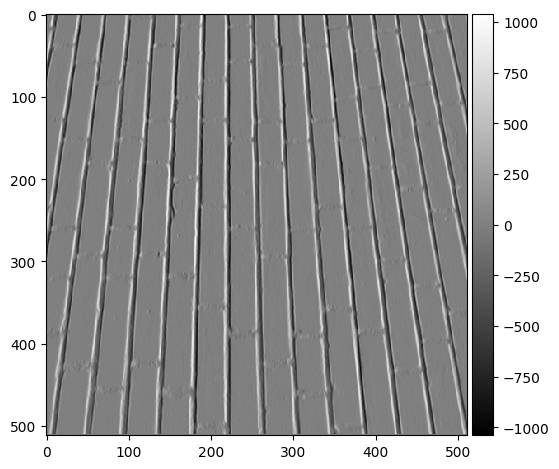

In [ ]:
output = apply_filter(brick(), v_filter)
ski.io.imshow(output, cmap=plt.cm.gray);

Take a look at the output for the brick image. Here, the filter highlights the vertical mortar joints between bricks, making them appear as bright lines on a darker background. Horizontal features are subdued, emphasizing vertical structures. The impact of a vertical filter is much more evident here right? Let's quickly apply a horizontal filter to both these images and view the results.

#### Horizontal Kernal

Take a look at the below horizontal filter.
In this filter notice how we've used larger values across the middle row to emphasize horizontal edges
. Rest of the code remains the exact same as earlier. Let's run this code and view the results.

In [ ]:
h_filter = [[-0.5, -5, -0.5],
        [0, 0, 0],
        [0.5, 5, 0.5]]

##### Horizontal Kernal for the "Camera" image

<ipython-input-19-b3421abcdfc0>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  ski.io.imshow(output, cmap=plt.cm.gray);


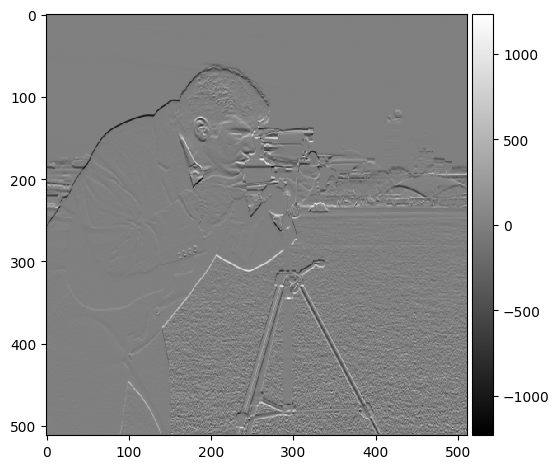

In [ ]:
output = apply_filter(camera(), h_filter)
ski.io.imshow(output, cmap=plt.cm.gray);

##### Horizontal Kernal for the "Brick" image

<ipython-input-20-f293272cddce>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  ski.io.imshow(output, cmap=plt.cm.gray);


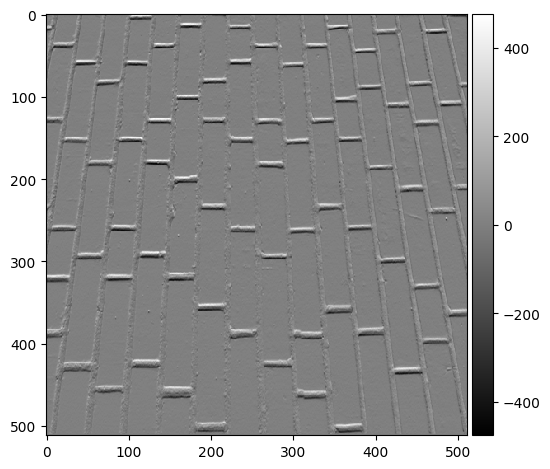

In [ ]:
output = apply_filter(brick(), h_filter)
ski.io.imshow(output, cmap=plt.cm.gray);

On applying a horizontal filter you saw how the man's shoulders, and other horizontal lines in background stand out as bright lines.
In case of the output for the brick image with a horizontal filter, we can see that the horizontal mortar joints between the bricks are emphasized.

Now with that, we've clearly understood how filters can extract specific information from images and the rile of the convolution layers in doing so. Don't forget to experiment with different images and filters and have a look at the transformed images. We've also attached a reading material for you with the different values for each filter to make things easier! In the next video let's learn a few more nuances of computer vision!